In [1]:
# first neural network with keras tutorial

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from keras.optimizers import SGD


Using TensorFlow backend.


In [2]:
# load the dataset
df_empty = np.genfromtxt('framingham.csv', delimiter=",")
print(df_empty.shape)
print(df_empty)

(4240, 16)
[[  1.  39.   4. ...  80.  77.   0.]
 [  0.  46.   2. ...  95.  76.   0.]
 [  1.  48.   1. ...  75.  70.   0.]
 ...
 [  0.  52.   2. ...  80. 107.   0.]
 [  1.  40.   3. ...  67.  72.   0.]
 [  0.  39.   3. ...  85.  80.   0.]]


In [3]:
imputer = KNNImputer(n_neighbors=3, weights="uniform")
df = imputer.fit_transform(df_empty)


In [4]:
# split into input (X) and output (y) variables
X = df[:,0:15]
y = df[:,15]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [5]:
# define the keras model
model = Sequential()
model.add(Dense(25, input_dim=15, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
# compile the keras model

opt = SGD(lr=0.0001)


model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
# Fit the model
history = model.fit(X_train, y_train, validation_split=0.33, epochs=150, batch_size=10)




Train on 1902 samples, validate on 938 samples
Epoch 1/150





1902/1902 [==============================] - 1s 643us/step - loss: 13.4260 - acc: 0.1556 - val_loss: 1.2265 - val_acc: 0.8284
Epoch 2/150
1902/1902 [==============================] - 0s 211us/step - loss: 1.0819 - acc: 0.7813 - val_loss: 1.0882 - val_acc: 0.6599
Epoch 3/150
1902/1902 [==============================] - 0s 181us/step - loss: 0.7277 - acc: 0.7923 - val_loss: 0.5853 - val_acc: 0.8507
Epoch 4/150
1902/1902 [==============================] - 0s 177us/step - loss: 0.5944 - acc: 0.7965 - val_loss: 0.5295 - val_acc: 0.8465
Epoch 5/150
1902/1902 [==============================] - 0s 225us/step - loss: 0.6078 - acc: 0.7997 - val_loss: 0.5306 - val_acc: 0.8507
Epoch 6/150
1902/1902 [==============================] - 0s 232us/step - loss: 0.5845 - acc: 0.8018 - val_loss: 1.1362 - val_acc: 0.4765
Epoch 7/150
1902/1902 [==============================] - 0s 246us/step - loss: 0.5910 - acc: 0.7934 - val_loss: 0.6639 - v

1902/1902 [==============================] - 0s 175us/step - loss: 0.4359 - acc: 0.8402 - val_loss: 0.4870 - val_acc: 0.8529
Epoch 47/150
1902/1902 [==============================] - 0s 192us/step - loss: 0.4627 - acc: 0.8270 - val_loss: 0.4514 - val_acc: 0.8561
Epoch 48/150
1902/1902 [==============================] - 0s 199us/step - loss: 0.4442 - acc: 0.8365 - val_loss: 0.5381 - val_acc: 0.8550
Epoch 49/150
1902/1902 [==============================] - 0s 188us/step - loss: 0.4454 - acc: 0.8412 - val_loss: 0.5487 - val_acc: 0.8539
Epoch 50/150
1902/1902 [==============================] - 0s 178us/step - loss: 0.4522 - acc: 0.8349 - val_loss: 0.9858 - val_acc: 0.3689
Epoch 51/150
1902/1902 [==============================] - 0s 175us/step - loss: 0.4575 - acc: 0.8302 - val_loss: 0.5416 - val_acc: 0.8550
Epoch 52/150
1902/1902 [==============================] - 0s 192us/step - loss: 0.4591 - acc: 0.8270 - val_loss: 0.4577 - val_acc: 0.8539
Epoch 53/150
1902/1902 [=======================

1902/1902 [==============================] - 0s 180us/step - loss: 0.4345 - acc: 0.8328 - val_loss: 0.5735 - val_acc: 0.7601
Epoch 106/150
1902/1902 [==============================] - 0s 204us/step - loss: 0.4299 - acc: 0.8375 - val_loss: 0.4279 - val_acc: 0.8539
Epoch 107/150
1902/1902 [==============================] - 0s 171us/step - loss: 0.4351 - acc: 0.8381 - val_loss: 0.4235 - val_acc: 0.8550
Epoch 108/150
1902/1902 [==============================] - 0s 192us/step - loss: 0.4257 - acc: 0.8475 - val_loss: 0.4307 - val_acc: 0.8529
Epoch 109/150
1902/1902 [==============================] - 0s 198us/step - loss: 0.4306 - acc: 0.8381 - val_loss: 0.4383 - val_acc: 0.8529
Epoch 110/150
1902/1902 [==============================] - 0s 186us/step - loss: 0.4286 - acc: 0.8381 - val_loss: 0.4574 - val_acc: 0.8529
Epoch 111/150
1902/1902 [==============================] - 0s 202us/step - loss: 0.4312 - acc: 0.8365 - val_loss: 0.7415 - val_acc: 0.5586
Epoch 112/150
1902/1902 [================

In [8]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


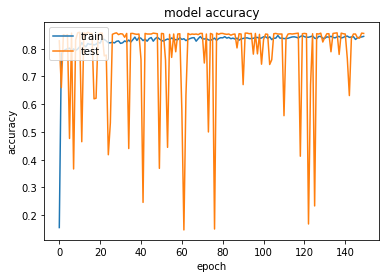

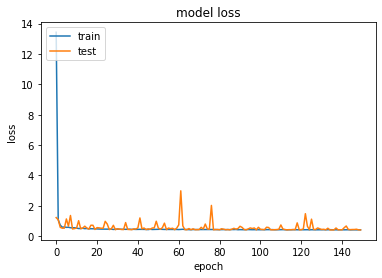

In [9]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [10]:
y_pred = model.predict_classes(X_test)
print(accuracy_score(y_test, y_pred))


0.8464285714285714


In [ ]:
#roc curve add this to the NN

In [ ]:
#roc curve add this to the NN